**AIVLE School 미니프로젝트**
### **공공데이터를 활용한 <span style="color:darkgreen">미세먼지 농도</span> 예측**
---

#### **<span style="color:red">[미션 안내]</span>**
* 개인 미션: 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요. <br> ([1-1]부터 [1-2]까지, [2-1]부터 [2-8]까지, [3-1]부터 [3-2]까지 필수 수행, [4-1]부터 선택 수행)
* 조별 미션: 개인 미션 수행한 내용에 대해 토론하여 발표 준비를 해주세요.

#### **<span style="color:red">[데이터 설명]</span>**

* 학습 데이터
    * air_2021.csv : 2021년 미세먼지 데이터
    * weather_2021.csv : 2021년 날씨 데이터
* 테스트 데이터
    * air_2022.csv : 2022년 미세먼지 데이터
    * weather_2022.csv : 2022년 날씨 데이터

# [Step 1] 탐색적 데이터 분석

In [1]:
# 필요한 라이브러리 설치 및 임포트
#!pip install pandas

import pandas as pd
import datetime

---

#### **<span style="color:blue">[1-1] air_21, air_22, weather_21, weather_22 데이터 로딩</span>**

In [81]:
# 데이터 로딩

air_21 = pd.read_csv("air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )
air_22 = pd.read_csv("air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )
weather_21 = pd.read_csv("weather_2021.csv", sep = ',', encoding='cp949')
weather_22 = pd.read_csv("weather_2022.csv", sep = ',', encoding='cp949')

#### **<span style="color:blue">[1-2] 필요한 데이터 분석 진행 </span>**

In [6]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
# head, tail, info, plot을 활용한 시각화 등 진행
display(air_21.head())
display(air_21.tail())

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
8755,서울 종로구,도시대기,111123,종로구,2021093020,0.003,0.7,0.020,0.036,35.0,24.0,서울 종로구 종로35가길 19
8756,서울 종로구,도시대기,111123,종로구,2021093021,0.003,0.6,0.016,0.035,34.0,21.0,서울 종로구 종로35가길 19
8757,서울 종로구,도시대기,111123,종로구,2021093022,0.003,0.6,0.012,0.036,30.0,19.0,서울 종로구 종로35가길 19
8758,서울 종로구,도시대기,111123,종로구,2021093023,0.003,0.6,0.004,0.042,33.0,19.0,서울 종로구 종로35가길 19
8759,서울 종로구,도시대기,111123,종로구,2021093024,0.003,0.6,0.003,0.042,29.0,17.0,서울 종로구 종로35가길 19


In [7]:
display(air_22.head())
display(air_22.tail())

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
2155,서울 종로구,도시대기,111123,종로구,2022033120,0.002,0.4,0.036,0.017,11.0,8.0,서울 종로구 종로35가길 19
2156,서울 종로구,도시대기,111123,종로구,2022033121,0.002,0.4,0.032,0.018,10.0,7.0,서울 종로구 종로35가길 19
2157,서울 종로구,도시대기,111123,종로구,2022033122,0.003,0.3,0.038,0.013,11.0,5.0,서울 종로구 종로35가길 19
2158,서울 종로구,도시대기,111123,종로구,2022033123,0.003,0.3,0.036,0.015,11.0,5.0,서울 종로구 종로35가길 19
2159,서울 종로구,도시대기,111123,종로구,2022033124,0.002,0.4,0.033,0.017,9.0,5.0,서울 종로구 종로35가길 19


In [8]:
display(weather_21.head())
display(weather_21.tail())

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,...,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
8754,108,서울,2021-12-31 19:00,-6.4,NaN,NaN,NaN,2.2,NaN,250.0,...,NaN,2000,NaN,NaN,-4.5,NaN,-0.5,-0.7,-0.1,1.0
8755,108,서울,2021-12-31 20:00,-6.3,NaN,NaN,NaN,4.1,NaN,320.0,...,NaN,2000,NaN,NaN,-5.3,NaN,-0.6,-0.8,-0.1,1.0
8756,108,서울,2021-12-31 21:00,-6.7,NaN,NaN,NaN,4.8,NaN,320.0,...,NaN,2000,NaN,NaN,-5.7,NaN,-0.7,-0.8,-0.1,1.0
8757,108,서울,2021-12-31 22:00,-7.5,NaN,NaN,NaN,3.0,NaN,320.0,...,NaN,2000,NaN,NaN,-6.2,NaN,-0.8,-0.9,-0.2,1.0
8758,108,서울,2021-12-31 23:00,-7.7,NaN,NaN,NaN,2.9,NaN,320.0,...,NaN,2000,NaN,NaN,-6.5,NaN,-0.9,-0.9,-0.2,1.0


In [9]:
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


In [10]:
air_21.describe()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,8760.0,8.760000e+03,8648.000000,8680.000000,8663.000000,8680.000000,8655.000000,8663.000000
mean,111123.0,2.021067e+09,0.003385,0.505645,0.029246,0.023346,38.925361,20.466005
std,0.0,3.450216e+04,0.000826,0.209516,0.019708,0.014456,47.470577,16.564915
min,111123.0,2.021010e+09,0.001000,0.200000,0.000000,0.003000,3.000000,1.000000
25%,111123.0,2.021040e+09,0.003000,0.400000,0.015000,0.012000,18.000000,10.000000
50%,111123.0,2.021070e+09,0.003000,0.400000,0.028000,0.019000,30.000000,16.000000
75%,111123.0,2.021100e+09,0.004000,0.600000,0.040000,0.031000,46.000000,25.000000
max,111123.0,2.021123e+09,0.011000,2.000000,0.137000,0.082000,942.000000,154.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
air_21.columns

Index(['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM25', '주소'],
      dtype='object')

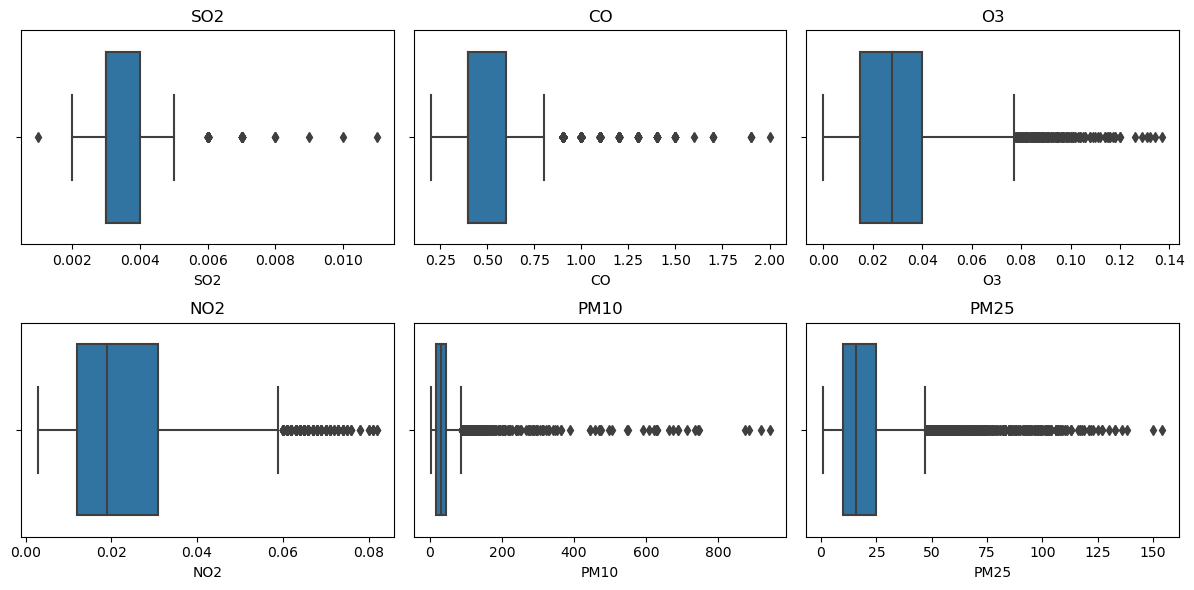

In [23]:
columns=['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
plt.figure(figsize=(12,6))
for i, column in enumerate(columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=column, data=air_21)
    plt.title(column)
plt.tight_layout()
plt.show()

In [24]:
air_22.describe()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,2160.0,2.160000e+03,2139.000000,2139.000000,2139.000000,2139.000000,2122.000000,2135.000000
mean,111123.0,2.022022e+09,0.003385,0.576718,0.024673,0.027864,40.563148,27.288993
std,0.0,8.347462e+03,0.000708,0.201352,0.014215,0.015426,23.480890,18.614884
min,111123.0,2.022010e+09,0.002000,0.300000,0.002000,0.005000,3.000000,1.000000
25%,111123.0,2.022012e+09,0.003000,0.400000,0.012000,0.015000,26.000000,15.000000
50%,111123.0,2.022021e+09,0.003000,0.500000,0.026000,0.024000,36.000000,22.000000
75%,111123.0,2.022031e+09,0.004000,0.700000,0.035000,0.040000,49.000000,35.000000
max,111123.0,2.022033e+09,0.006000,1.400000,0.074000,0.074000,239.000000,121.000000


In [25]:
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      2160 non-null   object 
 1   망       2160 non-null   object 
 2   측정소코드   2160 non-null   int64  
 3   측정소명    2160 non-null   object 
 4   측정일시    2160 non-null   int64  
 5   SO2     2139 non-null   float64
 6   CO      2139 non-null   float64
 7   O3      2139 non-null   float64
 8   NO2     2139 non-null   float64
 9   PM10    2122 non-null   float64
 10  PM25    2135 non-null   float64
 11  주소      2160 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 219.4+ KB


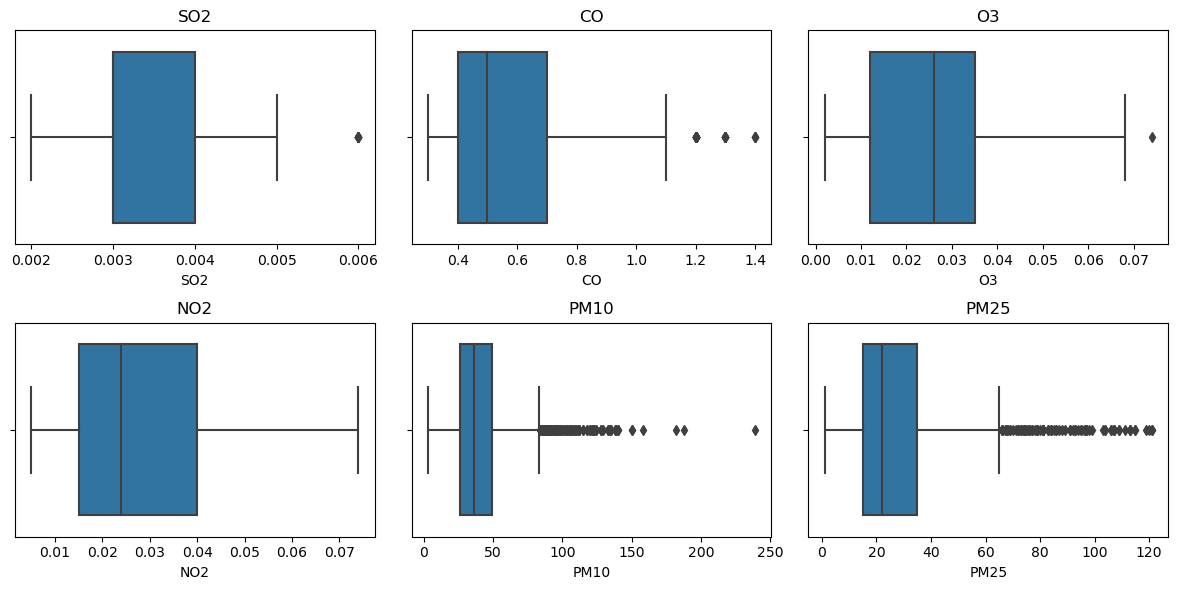

In [26]:
columns=['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
plt.figure(figsize=(12,6))
for i, column in enumerate(columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=column, data=air_22)
    plt.title(column)
plt.tight_layout()
plt.show()

In [27]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non-null   object 
 3   기온(°C)         8759 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        949 non-null    float64
 6   강수량 QC플래그      1763 non-null   float64
 7   풍속(m/s)        8757 non-null   float64
 8   풍속 QC플래그       2 non-null      float64
 9   풍향(16방위)       8757 non-null   float64
 10  풍향 QC플래그       2 non-null      float64
 11  습도(%)          8759 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8759 non-null   float64
 14  이슬점온도(°C)      8759 non-null   float64
 15  현지기압(hPa)      8759 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8759 non-null   float64
 18  해면기압 QC플

In [28]:
weather_21.describe()

,지점,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
count,8759.0,8759.000000,0.0,949.000000,1763.0,8757.000000,2.0,8757.000000,2.0,8759.000000,...,4547.000000,8759.000000,0.0,2.125000e+03,8754.000000,24.00000,8754.000000,8754.000000,8754.000000,8754.000000
mean,108.0,13.739194,NaN,1.250263,9.0,2.311328,9.0,169.658559,9.0,65.589223,...,15.161425,1719.765384,NaN,1.367177e+04,14.734304,1.87500,15.128581,14.555118,14.533276,14.827633
std,0.0,10.894786,NaN,3.398801,0.0,1.120906,0.0,107.549684,0.0,18.394276,...,13.537921,521.130959,NaN,4.170156e+05,12.042066,3.73366,10.175582,10.044423,9.739277,9.360493
min,108.0,-18.500000,NaN,0.000000,9.0,0.000000,9.0,0.000000,9.0,19.000000,...,1.000000,33.000000,NaN,1.000000e+00,-12.700000,0.00000,-4.700000,-4.600000,-3.000000,-0.800000
25%,108.0,6.000000,NaN,0.000000,9.0,1.500000,9.0,50.000000,9.0,51.000000,...,7.000000,1719.000000,NaN,5.000000e+00,4.300000,0.00000,5.900000,5.500000,5.600000,6.300000
50%,108.0,14.600000,NaN,0.100000,9.0,2.200000,9.0,200.000000,9.0,66.000000,...,10.000000,2000.000000,NaN,1.900000e+01,15.400000,0.00000,15.400000,14.700000,14.600000,15.100000
75%,108.0,22.600000,NaN,1.100000,9.0,2.900000,9.0,270.000000,9.0,80.000000,...,16.000000,2000.000000,NaN,1.901000e+03,23.600000,0.00000,24.100000,23.500000,23.400000,23.600000
max,108.0,36.300000,NaN,64.700000,9.0,8.300000,9.0,360.000000,9.0,100.000000,...,76.000000,2000.000000,NaN,1.916020e+07,56.800000,9.00000,35.700000,33.700000,31.900000,30.600000


In [29]:
weather_21.columns

Index(['지점', '지점명', '일시', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그',
       '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)',
       '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)',
       '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )',
       '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그',
       '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [34]:
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

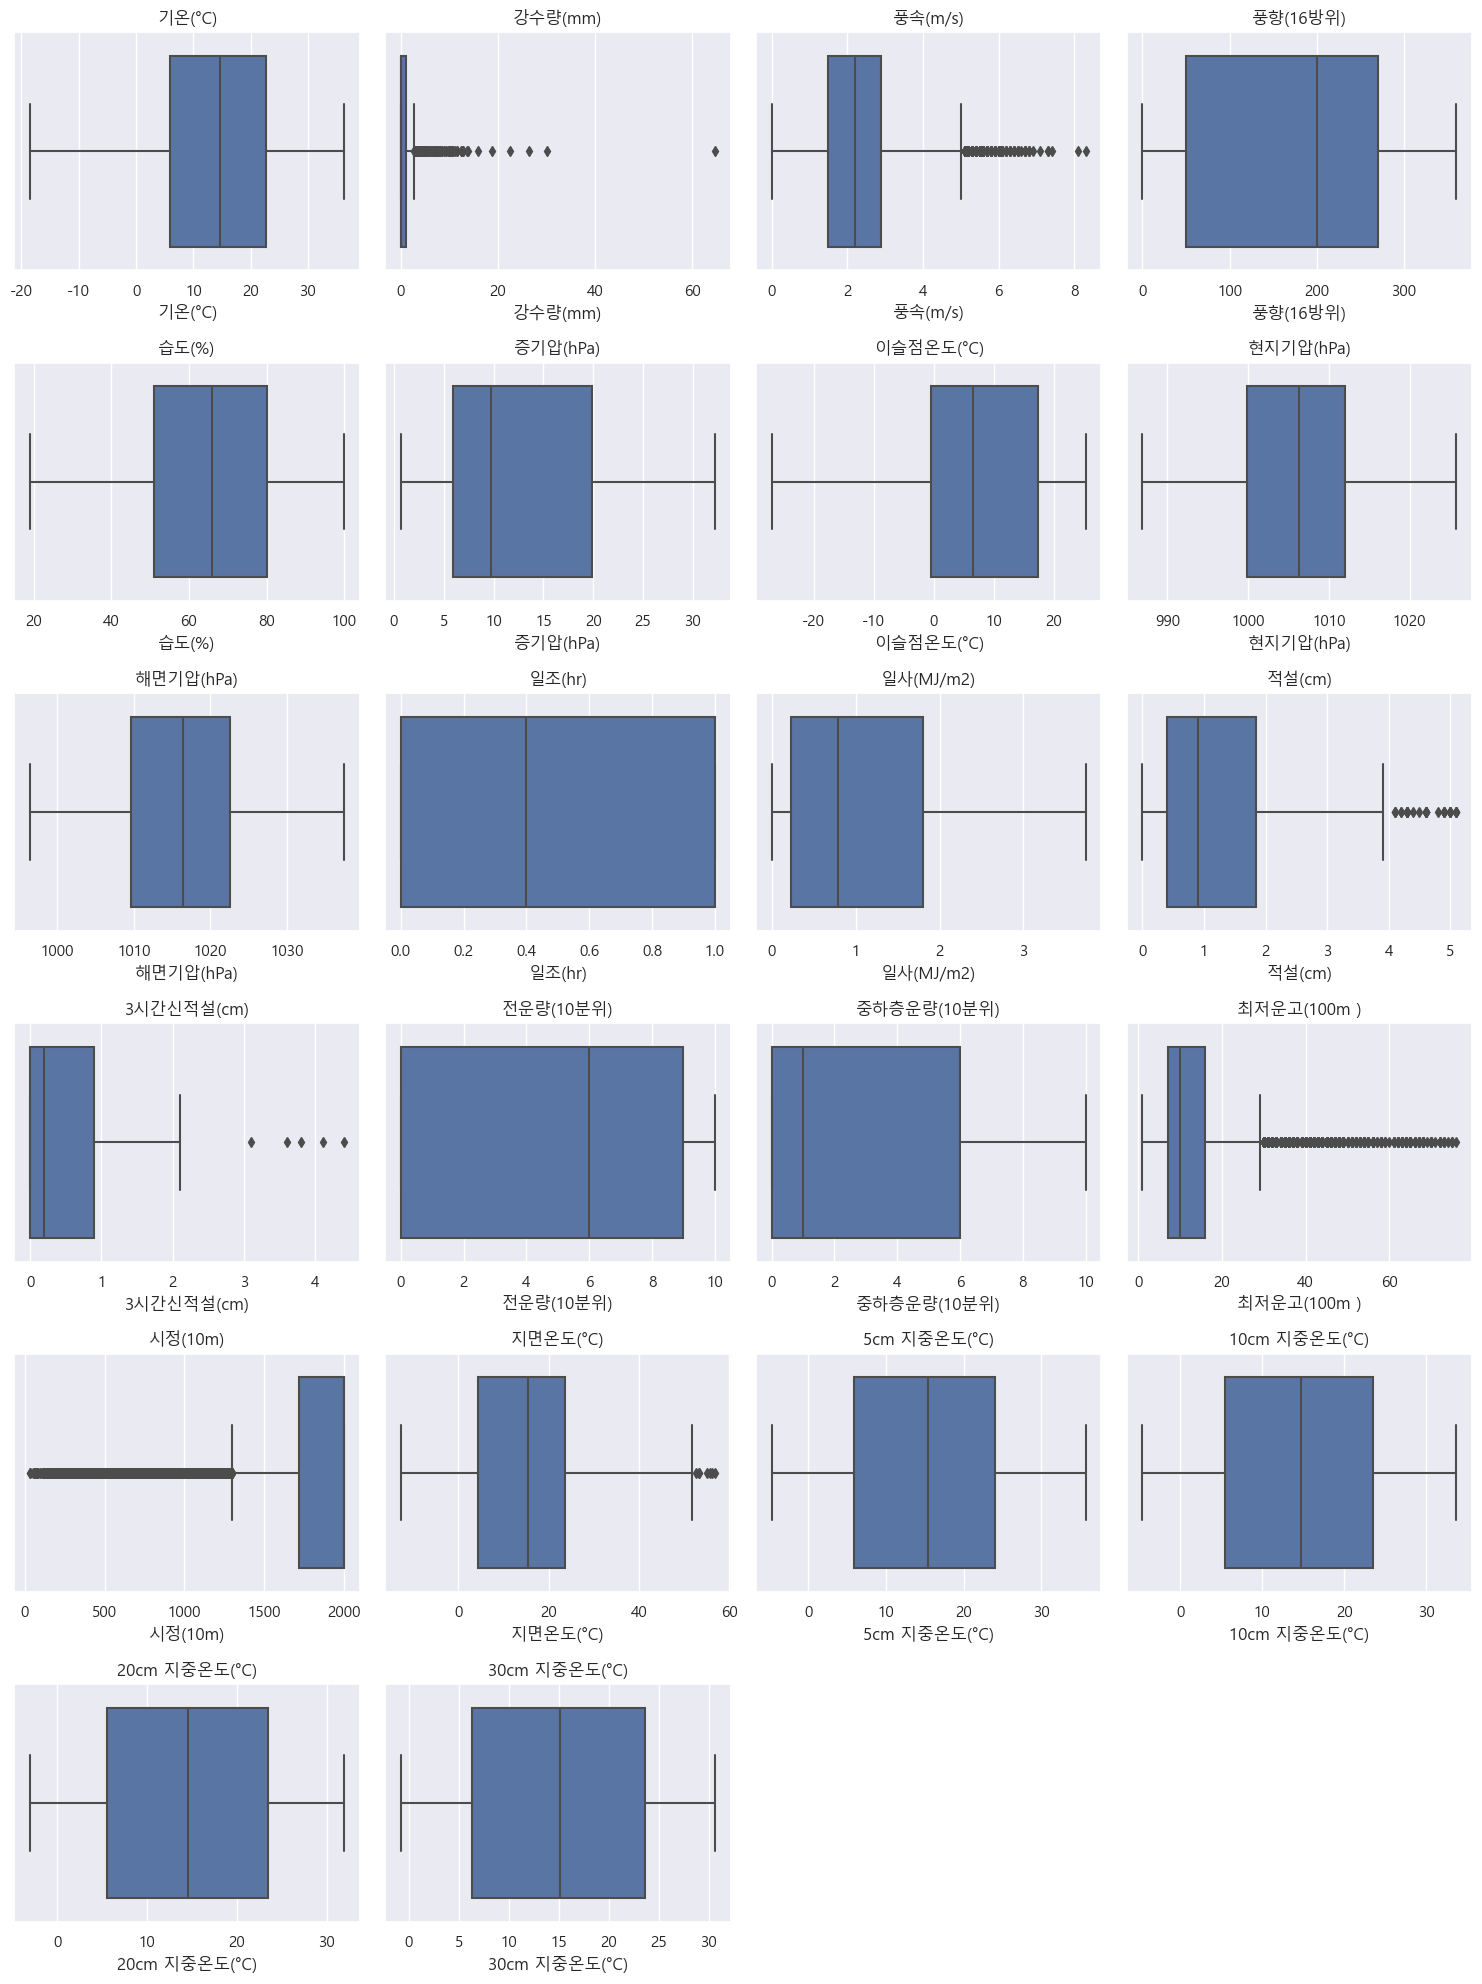

In [35]:
columns=['기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)',
         '일조(hr)', '일사(MJ/m2)', '적설(cm)','3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )',
       '시정(10m)', '지면온도(°C)','5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']
plt.figure(figsize=(15,20))
for i, column in enumerate(columns):
    plt.subplot(6,4,i+1)
    sns.boxplot(x=column, data=weather_21)
    plt.title(column)
plt.tight_layout()
plt.show()

In [36]:
weather_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             2160 non-null   int64  
 1   지점명            2160 non-null   object 
 2   일시             2160 non-null   object 
 3   기온(°C)         2160 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        81 non-null     float64
 6   강수량 QC플래그      382 non-null    float64
 7   풍속(m/s)        2160 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       2160 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          2160 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       2160 non-null   float64
 14  이슬점온도(°C)      2160 non-null   float64
 15  현지기압(hPa)      2160 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      2160 non-null   float64
 18  해면기압 QC플

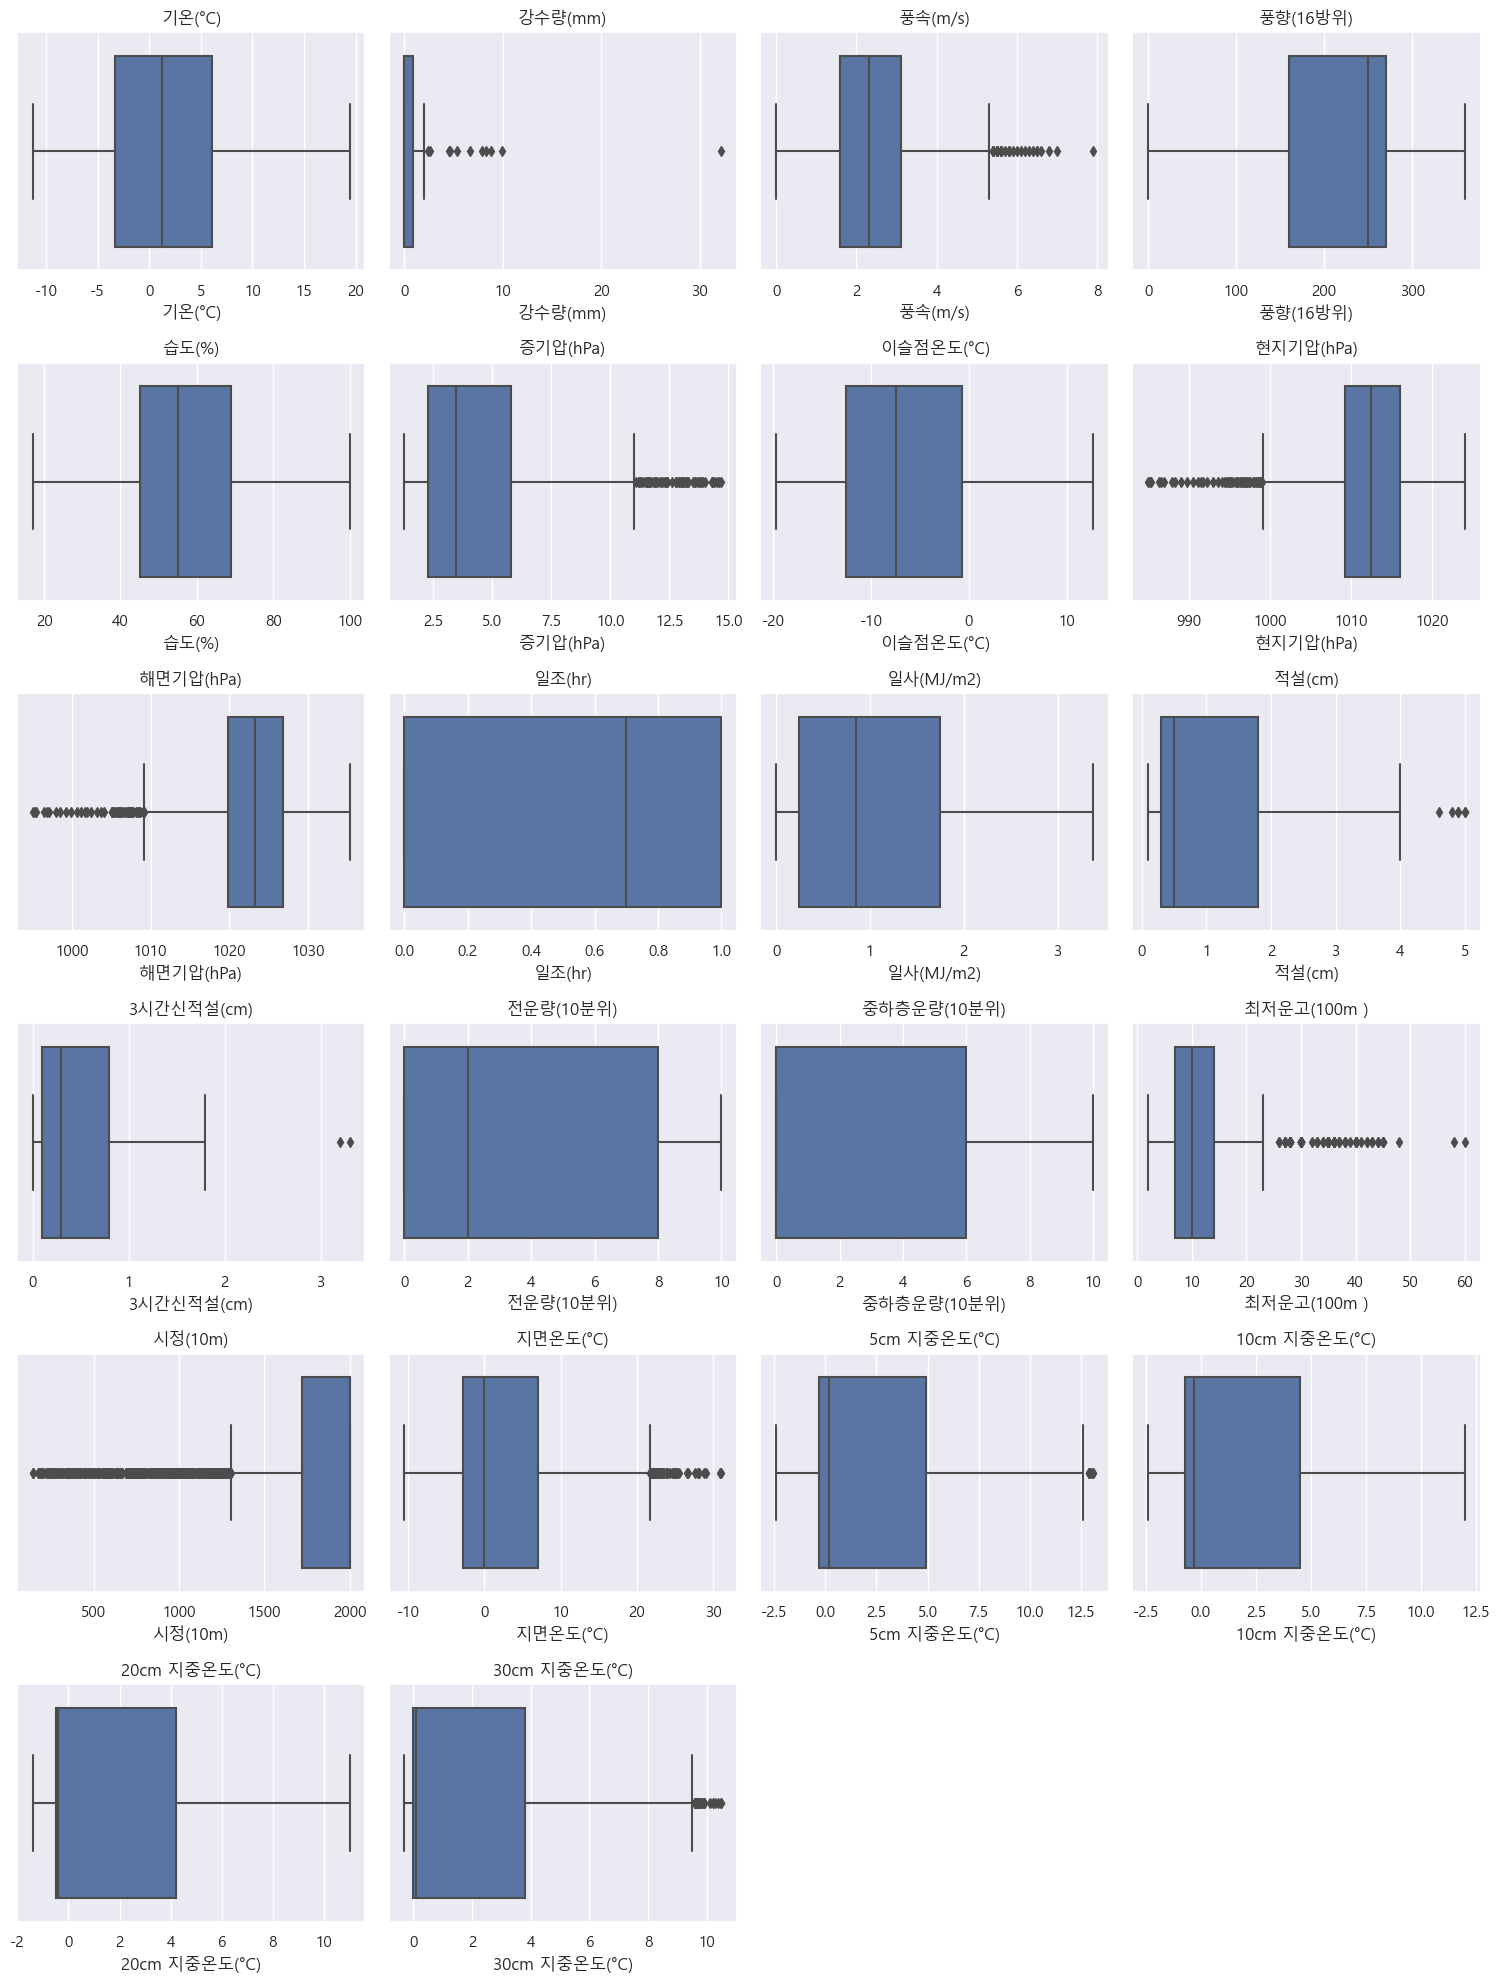

In [37]:
columns=['기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)',
         '일조(hr)', '일사(MJ/m2)', '적설(cm)','3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )',
       '시정(10m)', '지면온도(°C)','5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']
plt.figure(figsize=(15,20))
for i, column in enumerate(columns):
    plt.subplot(6,4,i+1)
    sns.boxplot(x=column, data=weather_22)
    plt.title(column)
plt.tight_layout()
plt.show()

# [Step 2] 데이터 전처리

#### **<span style="color:blue">[2-1] air_21, air_22 의 '측정일시'를 활용하여 'time' 변수 생성</span>**

* air_21, air_22  각각 '측정일시'를 활용하여 'time'변수 생성
    * 참고: 미세먼지 데이터는 1시-24시, 날씨 데이터는 0시-23시로 구성되어 있습니다. [2-3]에서 미세먼지와 날씨 데이터를 time 기준으로 합치려면 기준이 동일해야 합니다. 미세먼지 데이터에서 time 변수 생성 시 이를 미리 고려(예: air_21['측정일시'] -1)하세요.
* time 변수를 pd.to_datetime으로 데이터 타입 변경
    * 참고: format = '%Y%m%d%H'

In [41]:
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.1+ MB


In [53]:
air_21.head(1)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19


In [82]:
air_21['측정일시'] = air_21['측정일시'] - 1
air_21.head(1)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100100,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19


In [55]:
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


In [83]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
air_21['측정일시'] = air_21['측정일시'].astype('str')
air_21['time'] = pd.to_datetime(air_21['측정일시'], format='%Y%m%d%H')
air_21.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2021100100,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19,2021-10-01 00:00:00
1,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19,2021-10-01 01:00:00
2,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19,2021-10-01 02:00:00
3,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19,2021-10-01 03:00:00
4,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19,2021-10-01 04:00:00


In [84]:
display(air_22.head(1))
air_22['측정일시'] = air_22['측정일시'] - 1
display(air_22.head(1))
air_22['측정일시'] = air_22['측정일시'].astype('str')
air_22['time'] = pd.to_datetime(air_22['측정일시'], format='%Y%m%d%H')
air_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010100,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2022010100,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19,2022-01-01 00:00:00
1,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19,2022-01-01 01:00:00
2,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19,2022-01-01 02:00:00
3,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19,2022-01-01 03:00:00
4,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19,2022-01-01 04:00:00


---

#### **<span style="color:blue">[2-2] weather_21, weather_22 의 '일시'를 활용하여 'time' 변수 생성</span>**

* weather_21, weather_22 의 '일시'를 활용하여 'time'변수 생성
* time 변수를 pd.to_datetime으로 데이터 타입 변경

In [62]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             8759 non-null   int64         
 1   지점명            8759 non-null   object        
 2   일시             8759 non-null   object        
 3   기온(°C)         8759 non-null   float64       
 4   기온 QC플래그       0 non-null      float64       
 5   강수량(mm)        949 non-null    float64       
 6   강수량 QC플래그      1763 non-null   float64       
 7   풍속(m/s)        8757 non-null   float64       
 8   풍속 QC플래그       2 non-null      float64       
 9   풍향(16방위)       8757 non-null   float64       
 10  풍향 QC플래그       2 non-null      float64       
 11  습도(%)          8759 non-null   int64         
 12  습도 QC플래그       0 non-null      float64       
 13  증기압(hPa)       8759 non-null   float64       
 14  이슬점온도(°C)      8759 non-null   float64       
 15  현지기압(hPa)      8759 n

In [59]:
weather_21.head(1)

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6


In [85]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
weather_21['time'] = pd.to_datetime(weather_21['일시'])
weather_21.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,NaN,68,NaN,2.2,-13.5,1016.4,NaN,1027.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6,2021-01-01 01:00:00
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,NaN,69,NaN,2.1,-13.7,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6,2021-01-01 02:00:00
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,NaN,70,NaN,2.1,-13.7,1016.8,NaN,1028.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6,2021-01-01 03:00:00
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,NaN,71,NaN,2.2,-13.5,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5,2021-01-01 04:00:00
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,NaN,72,NaN,2.1,-13.8,1015.6,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5,2021-01-01 05:00:00


In [86]:
weather_22['time'] = pd.to_datetime(weather_22['일시'])
weather_22.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,NaN,41,NaN,1.3,-19.4,1021.9,NaN,1033.2,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0,2022-01-01 00:00:00
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,NaN,42,NaN,1.3,-19.7,1022.2,NaN,1033.6,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0,2022-01-01 01:00:00
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,NaN,43,NaN,1.3,-19.7,1022.3,NaN,1033.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0,2022-01-01 02:00:00
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,NaN,46,NaN,1.4,-18.8,1022.6,NaN,1034.0,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0,2022-01-01 03:00:00
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,NaN,48,NaN,1.4,-18.5,1021.9,NaN,1033.3,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0,2022-01-01 04:00:00


---

#### **<span style="color:blue">[2-3] 'time' 기준으로 데이터 합치기</span>**

* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보세요.
    * df_21에는 'time' 기준으로 21년도 미세먼지, 날씨 데이터를 합쳐보세요.
    * df_22에는 'time' 기준으로 22년도 미세먼지, 날씨 데이터를 합쳐보세요.

In [70]:
pd.set_option('display.max_columns', 500)

In [87]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
df_21 = pd.merge(air_21, weather_21, on='time')
df_21.head(1)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,서울 종로구,도시대기,111123,종로구,2021100100,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19,2021-10-01,108,서울,2021-10-01 00:00,19.2,NaN,NaN,NaN,1.3,NaN,360.0,NaN,83,NaN,18.4,16.2,998.8,NaN,1008.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,17.8,NaN,22.3,22.3,22.7,22.9


In [101]:
df_22 = pd.merge(air_22, weather_22, on='time')
df_22.head(1)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,서울 종로구,도시대기,111123,종로구,2022010100,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19,2022-01-01,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,NaN,41,NaN,1.3,-19.4,1021.9,NaN,1033.2,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0


---

#### **<span style="color:blue">[2-4] 사용하지 않을 변수 제거</span>**

* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.
    * df_21, df_22에 사용할 변수들만 넣어보세요.
* time 변수를 index로 세팅하고 (set_index) 데이터가 정렬되어 있지 않으므로 index 기준으로 정렬하세요. (sort_index)

In [75]:
# df_21, df_22에 사용할 변수들만 할당
df_21.columns

Index(['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM25', '주소', 'time', '지점', '지점명', '일시', '기온(°C)', '기온 QC플래그',
       '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그',
       '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그',
       '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)',
       '일사 QC플래그', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)',
       '운형(운형약어)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)',
       '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [89]:
df_21.drop(['지역', '망', '측정소코드', '측정소명', '측정일시','주소','지점', '지점명', '일시'],axis=1,inplace=True)
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 0 to 8758
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SO2            8647 non-null   float64       
 1   CO             8679 non-null   float64       
 2   O3             8662 non-null   float64       
 3   NO2            8679 non-null   float64       
 4   PM10           8654 non-null   float64       
 5   PM25           8662 non-null   float64       
 6   time           8759 non-null   datetime64[ns]
 7   기온(°C)         8759 non-null   float64       
 8   기온 QC플래그       0 non-null      float64       
 9   강수량(mm)        949 non-null    float64       
 10  강수량 QC플래그      1763 non-null   float64       
 11  풍속(m/s)        8757 non-null   float64       
 12  풍속 QC플래그       2 non-null      float64       
 13  풍향(16방위)       8757 non-null   float64       
 14  풍향 QC플래그       2 non-null      float64       
 15  습도(%)          8759 n

In [90]:
df_21.drop(['기온 QC플래그','강수량 QC플래그', '풍속 QC플래그',  '풍향 QC플래그', '해면기압 QC플래그',],axis=1, inplace=True)
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 0 to 8758
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SO2            8647 non-null   float64       
 1   CO             8679 non-null   float64       
 2   O3             8662 non-null   float64       
 3   NO2            8679 non-null   float64       
 4   PM10           8654 non-null   float64       
 5   PM25           8662 non-null   float64       
 6   time           8759 non-null   datetime64[ns]
 7   기온(°C)         8759 non-null   float64       
 8   강수량(mm)        949 non-null    float64       
 9   풍속(m/s)        8757 non-null   float64       
 10  풍향(16방위)       8757 non-null   float64       
 11  습도(%)          8759 non-null   int64         
 12  습도 QC플래그       0 non-null      float64       
 13  증기압(hPa)       8759 non-null   float64       
 14  이슬점온도(°C)      8759 non-null   float64       
 15  현지기압(hPa)      8759 n

In [79]:
df_21.columns

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'time', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '일조(hr)', '일조 QC플래그',
       '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)',
       '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [91]:
df_21.drop(['습도 QC플래그','현지기압 QC플래그','일조 QC플래그','지면온도 QC플래그','현상번호(국내식)','지면상태(지면상태코드)',
           '운형(운형약어)', '최저운고(100m )','일사 QC플래그', '적설(cm)', '3시간신적설(cm)'],
          axis=1, inplace=True)
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 0 to 8758
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SO2            8647 non-null   float64       
 1   CO             8679 non-null   float64       
 2   O3             8662 non-null   float64       
 3   NO2            8679 non-null   float64       
 4   PM10           8654 non-null   float64       
 5   PM25           8662 non-null   float64       
 6   time           8759 non-null   datetime64[ns]
 7   기온(°C)         8759 non-null   float64       
 8   강수량(mm)        949 non-null    float64       
 9   풍속(m/s)        8757 non-null   float64       
 10  풍향(16방위)       8757 non-null   float64       
 11  습도(%)          8759 non-null   int64         
 12  증기압(hPa)       8759 non-null   float64       
 13  이슬점온도(°C)      8759 non-null   float64       
 14  현지기압(hPa)      8759 non-null   float64       
 15  해면기압(hPa)      8759 n

In [92]:
origin_df_21 = df_21.copy()

In [93]:
origin_df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 0 to 8758
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SO2            8647 non-null   float64       
 1   CO             8679 non-null   float64       
 2   O3             8662 non-null   float64       
 3   NO2            8679 non-null   float64       
 4   PM10           8654 non-null   float64       
 5   PM25           8662 non-null   float64       
 6   time           8759 non-null   datetime64[ns]
 7   기온(°C)         8759 non-null   float64       
 8   강수량(mm)        949 non-null    float64       
 9   풍속(m/s)        8757 non-null   float64       
 10  풍향(16방위)       8757 non-null   float64       
 11  습도(%)          8759 non-null   int64         
 12  증기압(hPa)       8759 non-null   float64       
 13  이슬점온도(°C)      8759 non-null   float64       
 14  현지기압(hPa)      8759 non-null   float64       
 15  해면기압(hPa)      8759 n

In [94]:
# time 변수를 index로 세팅
df_21.set_index('time', inplace=True)
df_21.head(1)

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-01,0.003,0.6,0.002,0.039,31.0,18.0,19.2,NaN,1.3,360.0,83,18.4,16.2,998.8,1008.7,NaN,NaN,0.0,0,2000,17.8,22.3,22.3,22.7,22.9


In [95]:
df_21.sort_index(inplace=True)
display(df_21.head())
display(df_21.tail())

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,0.002,0.6,0.018,0.020,25.0,14.0,-8.7,NaN,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,NaN,NaN,0.0,0,2000,-6.9,-1.0,-0.8,0.3,1.6
2021-01-01 02:00:00,0.002,0.6,0.013,0.025,27.0,16.0,-9.1,NaN,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,NaN,NaN,0.0,0,2000,-7.1,-1.1,-0.8,0.3,1.6
2021-01-01 03:00:00,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,NaN,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,NaN,NaN,0.0,0,2000,-7.3,-1.2,-0.9,0.3,1.6
2021-01-01 04:00:00,0.003,0.6,0.008,0.032,24.0,14.0,-9.3,NaN,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,NaN,NaN,0.0,0,2000,-7.5,-1.3,-1.0,0.2,1.5
2021-01-01 05:00:00,0.002,0.7,0.003,0.037,26.0,16.0,-9.7,NaN,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,NaN,NaN,0.0,0,2000,-7.6,-1.3,-1.0,0.2,1.5


,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31 19:00:00,0.003,0.4,0.025,0.020,26.0,8.0,-6.4,NaN,2.2,250.0,34,1.3,-19.7,1021.1,1032.3,NaN,NaN,0.0,0,2000,-4.5,-0.5,-0.7,-0.1,1.0
2021-12-31 20:00:00,0.003,0.4,0.030,0.014,27.0,9.0,-6.3,NaN,4.1,320.0,35,1.3,-19.2,1021.2,1032.4,NaN,NaN,0.0,0,2000,-5.3,-0.6,-0.8,-0.1,1.0
2021-12-31 21:00:00,0.003,0.4,0.033,0.011,20.0,8.0,-6.7,NaN,4.8,320.0,36,1.3,-19.3,1021.2,1032.4,NaN,NaN,0.0,0,2000,-5.7,-0.7,-0.8,-0.1,1.0
2021-12-31 22:00:00,0.003,0.4,0.029,0.015,20.0,9.0,-7.5,NaN,3.0,320.0,37,1.3,-19.7,1021.8,1033.1,NaN,NaN,0.0,0,2000,-6.2,-0.8,-0.9,-0.2,1.0
2021-12-31 23:00:00,0.003,0.4,0.026,0.016,20.0,9.0,-7.7,NaN,2.9,320.0,38,1.3,-19.5,1021.9,1033.2,NaN,NaN,0.0,0,2000,-6.5,-0.9,-0.9,-0.2,1.0


---

In [97]:
df_21.columns

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)',
       '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)'],
      dtype='object')

In [98]:
df_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지역             2160 non-null   object        
 1   망              2160 non-null   object        
 2   측정소코드          2160 non-null   int64         
 3   측정소명           2160 non-null   object        
 4   측정일시           2160 non-null   object        
 5   SO2            2139 non-null   float64       
 6   CO             2139 non-null   float64       
 7   O3             2139 non-null   float64       
 8   NO2            2139 non-null   float64       
 9   PM10           2122 non-null   float64       
 10  PM25           2135 non-null   float64       
 11  주소             2160 non-null   object        
 12  time           2160 non-null   datetime64[ns]
 13  지점             2160 non-null   int64         
 14  지점명            2160 non-null   object        
 15  일시             2160 n

In [102]:
df_22 = df_22[['time', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)',
       '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)']]
df_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           2160 non-null   datetime64[ns]
 1   SO2            2139 non-null   float64       
 2   CO             2139 non-null   float64       
 3   O3             2139 non-null   float64       
 4   NO2            2139 non-null   float64       
 5   PM10           2122 non-null   float64       
 6   PM25           2135 non-null   float64       
 7   기온(°C)         2160 non-null   float64       
 8   강수량(mm)        81 non-null     float64       
 9   풍속(m/s)        2160 non-null   float64       
 10  풍향(16방위)       2160 non-null   int64         
 11  습도(%)          2160 non-null   int64         
 12  증기압(hPa)       2160 non-null   float64       
 13  이슬점온도(°C)      2160 non-null   float64       
 14  현지기압(hPa)      2160 non-null   float64       
 15  해면기압(hPa)      2160 n

In [103]:
origin_df_22 = df_22.copy()
origin_df_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           2160 non-null   datetime64[ns]
 1   SO2            2139 non-null   float64       
 2   CO             2139 non-null   float64       
 3   O3             2139 non-null   float64       
 4   NO2            2139 non-null   float64       
 5   PM10           2122 non-null   float64       
 6   PM25           2135 non-null   float64       
 7   기온(°C)         2160 non-null   float64       
 8   강수량(mm)        81 non-null     float64       
 9   풍속(m/s)        2160 non-null   float64       
 10  풍향(16방위)       2160 non-null   int64         
 11  습도(%)          2160 non-null   int64         
 12  증기압(hPa)       2160 non-null   float64       
 13  이슬점온도(°C)      2160 non-null   float64       
 14  현지기압(hPa)      2160 non-null   float64       
 15  해면기압(hPa)      2160 n

In [104]:
df_22.set_index('time', inplace=True)
df_22.sort_index(inplace=True)

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,0.002,0.6,0.018,0.020,25.0,14.0,-8.7,NaN,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,NaN,NaN,0.0,0,2000,-6.9,-1.0,-0.8,0.3,1.6
2021-01-01 02:00:00,0.002,0.6,0.013,0.025,27.0,16.0,-9.1,NaN,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,NaN,NaN,0.0,0,2000,-7.1,-1.1,-0.8,0.3,1.6
2021-01-01 03:00:00,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,NaN,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,NaN,NaN,0.0,0,2000,-7.3,-1.2,-0.9,0.3,1.6
2021-01-01 04:00:00,0.003,0.6,0.008,0.032,24.0,14.0,-9.3,NaN,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,NaN,NaN,0.0,0,2000,-7.5,-1.3,-1.0,0.2,1.5
2021-01-01 05:00:00,0.002,0.7,0.003,0.037,26.0,16.0,-9.7,NaN,1.9,20.0,72,2.1,-13.8,1015.6,1026.9,NaN,NaN,0.0,0,2000,-7.6,-1.3,-1.0,0.2,1.5


,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31 19:00:00,0.003,0.4,0.025,0.020,26.0,8.0,-6.4,NaN,2.2,250.0,34,1.3,-19.7,1021.1,1032.3,NaN,NaN,0.0,0,2000,-4.5,-0.5,-0.7,-0.1,1.0
2021-12-31 20:00:00,0.003,0.4,0.030,0.014,27.0,9.0,-6.3,NaN,4.1,320.0,35,1.3,-19.2,1021.2,1032.4,NaN,NaN,0.0,0,2000,-5.3,-0.6,-0.8,-0.1,1.0
2021-12-31 21:00:00,0.003,0.4,0.033,0.011,20.0,8.0,-6.7,NaN,4.8,320.0,36,1.3,-19.3,1021.2,1032.4,NaN,NaN,0.0,0,2000,-5.7,-0.7,-0.8,-0.1,1.0
2021-12-31 22:00:00,0.003,0.4,0.029,0.015,20.0,9.0,-7.5,NaN,3.0,320.0,37,1.3,-19.7,1021.8,1033.1,NaN,NaN,0.0,0,2000,-6.2,-0.8,-0.9,-0.2,1.0
2021-12-31 23:00:00,0.003,0.4,0.026,0.016,20.0,9.0,-7.7,NaN,2.9,320.0,38,1.3,-19.5,1021.9,1033.2,NaN,NaN,0.0,0,2000,-6.5,-0.9,-0.9,-0.2,1.0


In [105]:
display(df_22.head())
display(df_22.tail())

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,NaN,1.9,320,41,1.3,-19.4,1021.9,1033.2,NaN,NaN,0,0,2000,-7.0,-1.0,-1.0,-0.2,1.0
2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,NaN,1.8,270,42,1.3,-19.7,1022.2,1033.6,NaN,NaN,0,0,2000,-7.2,-1.1,-1.1,-0.2,1.0
2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,NaN,1.2,270,43,1.3,-19.7,1022.3,1033.7,NaN,NaN,0,0,2000,-7.5,-1.3,-1.2,-0.2,1.0
2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,NaN,1.4,290,46,1.4,-18.8,1022.6,1034.0,NaN,NaN,0,0,2000,-7.6,-1.4,-1.2,-0.2,1.0
2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,NaN,1.7,340,48,1.4,-18.5,1021.9,1033.3,NaN,NaN,0,0,2000,-7.6,-1.4,-1.3,-0.3,1.0


,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,
2022-03-31 19:00:00,0.002,0.4,0.036,0.017,11.0,8.0,12.3,NaN,2.9,340,47,6.7,1.2,1013.4,1023.8,0.4,0.2,6,1,2000,10.0,12.6,11.8,11.0,10.2
2022-03-31 20:00:00,0.002,0.4,0.032,0.018,10.0,7.0,11.6,NaN,2.7,340,48,6.5,0.9,1014.6,1025.0,NaN,NaN,6,0,2000,8.9,12.2,11.6,11.0,10.3
2022-03-31 21:00:00,0.003,0.3,0.038,0.013,11.0,5.0,10.5,NaN,3.5,320,51,6.4,0.7,1015.4,1025.9,NaN,NaN,1,1,2000,7.8,11.8,11.4,11.0,10.4
2022-03-31 22:00:00,0.003,0.3,0.036,0.015,11.0,5.0,9.3,NaN,1.9,50,58,6.8,1.4,1016.4,1026.9,NaN,NaN,3,3,2000,7.3,11.4,11.1,10.9,10.5
2022-03-31 23:00:00,0.002,0.4,0.033,0.017,9.0,5.0,8.4,NaN,1.2,360,61,6.7,1.3,1016.9,1027.4,NaN,NaN,1,1,2000,6.7,11.0,10.8,10.8,10.5


#### **<span style="color:blue">[2-5] 변수들의 결측치 처리</span>**

In [108]:
# df_21, df_22의 결측치 확인
print(df_21.isna().sum())
print(df_22.isna().sum())

SO2               112
CO                 80
O3                 97
NO2                80
PM10              105
PM25               97
기온(°C)              0
강수량(mm)          7810
풍속(m/s)             2
풍향(16방위)            2
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           3968
일사(MJ/m2)        3968
전운량(10분위)           2
중하층운량(10분위)         0
시정(10m)             0
지면온도(°C)            5
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64
SO2                21
CO                 21
O3                 21
NO2                21
PM10               38
PM25               25
기온(°C)              0
강수량(mm)          2079
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           1089
일사(MJ/m2)        1089
전운량(10분위)           0
중하층운량(10분위)         0
시정(10m)            

In [111]:
# df_21, df_22의 변수 중 결측치를 처리 (ex: 강수량(mm))
df_21['강수량(mm)'].fillna(0, inplace=True)
df_21['강수량(mm)'].isna().sum()

0

In [113]:
#df_22['강수량(mm)'].isna().sum()
df_22['강수량(mm)'].fillna(0, inplace=True)
df_22['강수량(mm)'].isna().sum()

0

In [121]:
# df_21, df_22의 결측치 확인
print(df_21.isna().sum())
print(df_22.isna().sum())

SO2               112
CO                 80
O3                 97
NO2                80
PM10              105
PM25               97
기온(°C)              0
강수량(mm)             0
풍속(m/s)             2
풍향(16방위)            2
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           3968
일사(MJ/m2)        3968
전운량(10분위)           2
중하층운량(10분위)         0
시정(10m)             0
지면온도(°C)            5
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64
SO2                21
CO                 21
O3                 21
NO2                21
PM10               38
PM25               25
기온(°C)              0
강수량(mm)             0
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           1089
일사(MJ/m2)        1089
전운량(10분위)           0
중하층운량(10분위)         0
시정(10m)            

In [125]:
df_21.columns

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)',
       '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)'],
      dtype='object')

In [130]:
# df_21, df_22의 남은 결측치를 처리
cols = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
df_21[cols] = df_21[cols].interpolate()
df_22[cols] = df_22[cols].interpolate()
# df_21, df_22의 결측치 확인
print(df_21.isna().sum())
print(df_22.isna().sum())

SO2                 0
CO                  0
O3                  0
NO2                 0
PM10                0
PM25                0
기온(°C)              0
강수량(mm)             0
풍속(m/s)             2
풍향(16방위)            2
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           3968
일사(MJ/m2)        3968
전운량(10분위)           2
중하층운량(10분위)         0
시정(10m)             0
지면온도(°C)            5
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64
SO2                 0
CO                  0
O3                  0
NO2                 0
PM10                0
PM25                0
기온(°C)              0
강수량(mm)             0
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           1089
일사(MJ/m2)        1089
전운량(10분위)           0
중하층운량(10분위)         0
시정(10m)            

In [133]:
cols = ['풍속(m/s)', '풍향(16방위)','전운량(10분위)','지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)','30cm 지중온도(°C)']
df_21[cols] = df_21[cols].fillna(method='ffill')
df_21.isna().sum()

SO2                 0
CO                  0
O3                  0
NO2                 0
PM10                0
PM25                0
기온(°C)              0
강수량(mm)             0
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)           3968
일사(MJ/m2)        3968
전운량(10분위)           0
중하층운량(10분위)         0
시정(10m)             0
지면온도(°C)            0
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
dtype: int64

In [134]:
# df_21, df_22의 결측치 재확인
df_21.drop(['일조(hr)','일사(MJ/m2)'],axis=1,inplace=True)
df_22.drop(['일조(hr)','일사(MJ/m2)'],axis=1,inplace=True)
print(df_21.isna().sum())
print(df_22.isna().sum())

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64


In [135]:
print(df_21.isna().sum().sum())
print(df_22.isna().sum().sum())

0
0


---

#### **<span style="color:blue">[2-6] 전일 같은 시간 미세먼지 농도 변수 추가</span>**

* 먼저 df_21, df_22에 month, day, hour 변수를 추가하세요.
    * 예) dt.month, dt.day, dt.hour 사용 또는 datetimeindex에서는 df.index.month 등 사용 가능
* 모델링에 유용한 변수로 전일 같은 시간(24시간 전) 미세먼지 농도 변수를 추가하세요.
    * 시계열 데이터 처리를 위한 shift 연산을 참고하세요.

In [136]:
origin_df_21 = df_21.copy()
origin_df_22 = df_22.copy()

In [137]:
# df_21, df_22의 index(time)를 month, day, hour 로 쪼개기 (year는 필요 없음). 이후에 저장 시 index(time)은 포함하지 않음.
df_21['month'] = df_21.index.month
df_21['day'] = df_21.index.day
df_21['hour'] = df_21.index.hour
df_21.head(1)

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,0.002,0.6,0.018,0.02,25.0,14.0,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0,2000,-6.9,-1.0,-0.8,0.3,1.6,1,1,1


In [139]:
df_22['month'] = df_22.index.month
df_22['day'] = df_22.index.day
df_22['hour'] = df_22.index.hour
df_22.head(1)

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,320,41,1.3,-19.4,1021.9,1033.2,0,0,2000,-7.0,-1.0,-1.0,-0.2,1.0,1,1,0


In [140]:
origin_df_21 = df_21.copy()
origin_df_22 = df_22.copy()

In [141]:
# df_21, df_22에 전일 같은 시간 미세먼지 농도 변수(PM10_lag1) 추가
# 전일 같은 시간은 24시간 전 입니다.
df_21['PM10_lag1'] = df_21['PM10'].shift(24)
df_21[['PM10', 'PM10_lag1']].head(25)

,PM10,PM10_lag1
time,,
2021-01-01 01:00:00,25.0,NaN
2021-01-01 02:00:00,27.0,NaN
2021-01-01 03:00:00,23.0,NaN
2021-01-01 04:00:00,24.0,NaN
2021-01-01 05:00:00,26.0,NaN
2021-01-01 06:00:00,27.0,NaN
2021-01-01 07:00:00,30.0,NaN
2021-01-01 08:00:00,33.0,NaN
2021-01-01 09:00:00,35.0,NaN


In [142]:
df_22['PM10_lag1'] = df_22['PM10'].shift(24)
df_22[['PM10', 'PM10_lag1']].head(25)

,PM10,PM10_lag1
time,,
2022-01-01 00:00:00,23.0,NaN
2022-01-01 01:00:00,20.0,NaN
2022-01-01 02:00:00,20.0,NaN
2022-01-01 03:00:00,19.0,NaN
2022-01-01 04:00:00,24.0,NaN
2022-01-01 05:00:00,19.0,NaN
2022-01-01 06:00:00,24.0,NaN
2022-01-01 07:00:00,27.0,NaN
2022-01-01 08:00:00,26.0,NaN


---

#### **<span style="color:blue">[2-7] t+1 시점의 미세먼지 농도 데이터 생성</span>**

* t+1 시점은 1시간 후 입니다.
* t+1 시점의 미세먼지 농도 변수(PM10_1)를 생성하세요.
* t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target) 입니다.

In [143]:
# df_21, df_22에 t+1 시점 변수(PM10_1) 추가
df_21['PM10_1'] = df_21['PM10'].shift(-1)
df_22['PM10_1'] = df_22['PM10'].shift(-1)

,PM10,PM10_lag1
time,,
2022-01-01 00:00:00,23.0,NaN
2022-01-01 01:00:00,20.0,NaN
2022-01-01 02:00:00,20.0,NaN
2022-01-01 03:00:00,19.0,NaN
2022-01-01 04:00:00,24.0,NaN


In [145]:
df_22[['PM10', 'PM10_1']].head()

,PM10,PM10_1
time,,
2022-01-01 00:00:00,23.0,20.0
2022-01-01 01:00:00,20.0,20.0
2022-01-01 02:00:00,20.0,19.0
2022-01-01 03:00:00,19.0,24.0
2022-01-01 04:00:00,24.0,19.0


In [157]:
df_21.head(1)

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour,PM10_lag1,PM10_1
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,0.002,0.6,0.018,0.02,25.0,14.0,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0,2000,-6.9,-1.0,-0.8,0.3,1.6,1,1,1,25.0,27.0


In [159]:
# 결측치가 있다면 처리
df_21['PM10_lag1'].fillna(df_21['PM10'],inplace=True)
df_21[['PM10','PM10_lag1']].head(26)

,PM10,PM10_lag1
time,,
2021-01-01 01:00:00,25.0,25.0
2021-01-01 02:00:00,27.0,27.0
2021-01-01 03:00:00,23.0,23.0
2021-01-01 04:00:00,24.0,24.0
2021-01-01 05:00:00,26.0,26.0
2021-01-01 06:00:00,27.0,27.0
2021-01-01 07:00:00,30.0,30.0
2021-01-01 08:00:00,33.0,33.0
2021-01-01 09:00:00,35.0,35.0


In [160]:
df_22['PM10_lag1'].fillna(df_22['PM10'],inplace=True)
df_22[['PM10','PM10_lag1']].head(26)

,PM10,PM10_lag1
time,,
2022-01-01 00:00:00,23.0,23.0
2022-01-01 01:00:00,20.0,20.0
2022-01-01 02:00:00,20.0,20.0
2022-01-01 03:00:00,19.0,19.0
2022-01-01 04:00:00,24.0,24.0
2022-01-01 05:00:00,19.0,19.0
2022-01-01 06:00:00,24.0,24.0
2022-01-01 07:00:00,27.0,27.0
2022-01-01 08:00:00,26.0,26.0


In [162]:
df_21['PM10_1'].fillna(df_21['PM10'],inplace=True)
df_21[['PM10','PM10_1']].tail()

,PM10,PM10_1
time,,
2021-12-31 19:00:00,26.0,27.0
2021-12-31 20:00:00,27.0,20.0
2021-12-31 21:00:00,20.0,20.0
2021-12-31 22:00:00,20.0,20.0
2021-12-31 23:00:00,20.0,20.0


In [164]:
df_22['PM10_1'].fillna(df_22['PM10'],inplace=True)
df_22[['PM10','PM10_1']].tail()

,PM10,PM10_1
time,,
2022-03-31 19:00:00,11.0,10.0
2022-03-31 20:00:00,10.0,11.0
2022-03-31 21:00:00,11.0,11.0
2022-03-31 22:00:00,11.0,9.0
2022-03-31 23:00:00,9.0,9.0


In [166]:
df_22.isna().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
month            0
day              0
hour             0
PM10_lag1        0
PM10_1           0
dtype: int64

---

#### **<span style="color:blue">[2-8] train, test 데이터 분리</span>**

* 21년도 데이터(df_21)를 train 데이터로 저장하세요. y 값을 제외하고 train_x로 저장한 후 y 값은 train_y로 저장하세요.
* 22년도 데이터(df_22)를 test 데이터로 저장하세요. y 값을 제외하고 test_x로 저장한 후 y 값은 test_y로 저장하세요.
* 각각의 데이터프레임을 csv 파일로 저장하세요. (train_x.csv / train_y.csv / test_x.csv / test_y.csv) (단, 인덱스 제외)
* y값은 'PM10_1' 즉, t+1 시점의 미세먼지 농도입니다.

In [167]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
target = 'PM10_1'
train_x = df_21.drop(target, axis=1)
train_y = df_21[target]
test_x = df_22.drop(target,axis=1)
test_y = df_22[target]

In [168]:
# 각각의 데이터프레임을 csv 파일로 저장 (train_x.csv / train_y.csv / test_x.csv / test_y.csv)
train_x.to_csv('train_x.csv', index=False, encoding='utf-8')
train_y.to_csv('train_y.csv', index=False, encoding='utf-8')
test_x.to_csv('test_x.csv', index=False, encoding='utf-8')
test_y.to_csv('test_y.csv', index=False, encoding='utf-8')

In [169]:
df_21.corr()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour,PM10_lag1,PM10_1
SO2,1.000000,0.339825,0.107548,0.330673,0.219089,0.380862,0.042308,-0.051066,-0.059394,0.024220,-0.154976,-0.063182,-0.024397,-0.016038,-0.017726,0.012286,-0.019796,-0.097103,0.008227,-0.076618,-0.094016,-0.117777,-0.137502,-0.159779,0.056505,0.086566,0.148791,0.217421
CO,0.339825,1.000000,-0.463338,0.866818,0.312303,0.639493,-0.398064,-0.053370,-0.320208,-0.075023,0.061391,-0.395340,-0.328503,0.344177,0.352301,-0.062101,-0.070390,-0.315662,-0.471180,-0.499129,-0.499887,-0.503378,-0.507412,-0.091939,0.076065,-0.012990,0.151988,0.317331
O3,0.107548,-0.463338,1.000000,-0.578599,-0.027972,-0.086960,0.509194,0.001714,0.343397,0.223001,-0.309308,0.328341,0.325685,-0.392924,-0.404780,0.036969,0.001096,0.155241,0.592488,0.478035,0.448235,0.407159,0.381044,-0.095907,0.009744,0.242448,0.003219,-0.028541
NO2,0.330673,0.866818,-0.578599,1.000000,0.243391,0.518933,-0.322741,-0.051115,-0.418299,-0.148425,0.028915,-0.343477,-0.272973,0.347918,0.351925,-0.027964,-0.051406,-0.198569,-0.422856,-0.422415,-0.420532,-0.421758,-0.426842,-0.062723,0.060202,0.012839,0.127883,0.248534
PM10,0.219089,0.312303,-0.027972,0.243391,1.000000,0.675415,-0.126745,-0.053474,0.009661,0.100983,-0.062667,-0.203882,-0.138062,0.021942,0.027519,-0.099516,-0.086900,-0.354755,-0.139327,-0.177305,-0.185077,-0.196660,-0.209427,-0.167678,0.024065,0.025745,0.311693,0.982085
PM25,0.380862,0.639493,-0.086960,0.518933,0.675415,1.000000,-0.175840,-0.070315,-0.148857,0.088571,0.000485,-0.227060,-0.156816,0.158540,0.161857,-0.046583,-0.076641,-0.515951,-0.223891,-0.276270,-0.285451,-0.301018,-0.316973,-0.124647,0.035198,0.033919,0.255232,0.664053
기온(°C),0.042308,-0.398064,0.509194,-0.322741,-0.126745,-0.175840,1.000000,0.034132,-0.070505,-0.181454,0.145404,0.881615,0.926402,-0.680025,-0.707822,0.307510,0.153382,0.068418,0.946662,0.950997,0.938454,0.917758,0.901952,0.218144,0.012947,0.131491,-0.145817,-0.126600
강수량(mm),-0.051066,-0.053370,0.001714,-0.051115,-0.053474,-0.070315,0.034132,1.000000,0.067212,-0.028206,0.174896,0.090728,0.088094,-0.117994,-0.115631,0.144384,0.160074,-0.255459,0.027143,0.047420,0.055132,0.056975,0.058077,0.001783,0.001159,0.015913,-0.018654,-0.057153
풍속(m/s),-0.059394,-0.320208,0.343397,-0.418299,0.009661,-0.148857,-0.070505,0.067212,1.000000,0.173089,-0.285506,-0.147954,-0.170238,-0.045568,-0.040094,-0.027432,0.035991,0.106536,0.013892,-0.069038,-0.083449,-0.103405,-0.112846,-0.106110,-0.024162,0.204615,0.092986,0.005313
풍향(16방위),0.024220,-0.075023,0.223001,-0.148425,0.100983,0.088571,-0.181454,-0.028206,0.173089,1.000000,-0.200920,-0.189045,-0.231850,0.043986,0.052206,-0.176870,-0.095071,0.025532,-0.138044,-0.146553,-0.152989,-0.165309,-0.175071,-0.041322,-0.024665,0.204953,0.099261,0.102244


<Axes: xlabel='강수량(mm)', ylabel='PM10'>

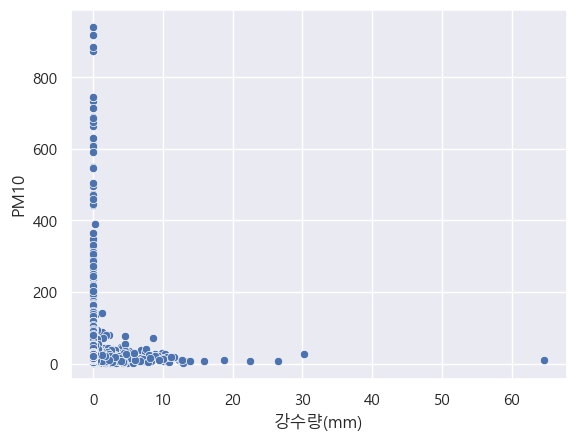

In [170]:
sns.scatterplot(x='강수량(mm)', y='PM10', data=df_21)

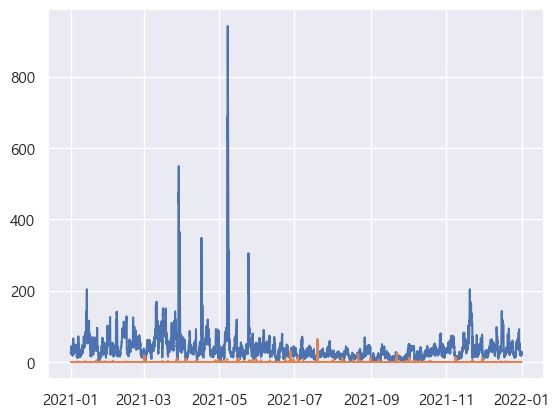

In [172]:
plt.plot(df_21.index, df_21['PM10'])
plt.plot(df_21.index, df_21['강수량(mm)'])
plt.show()

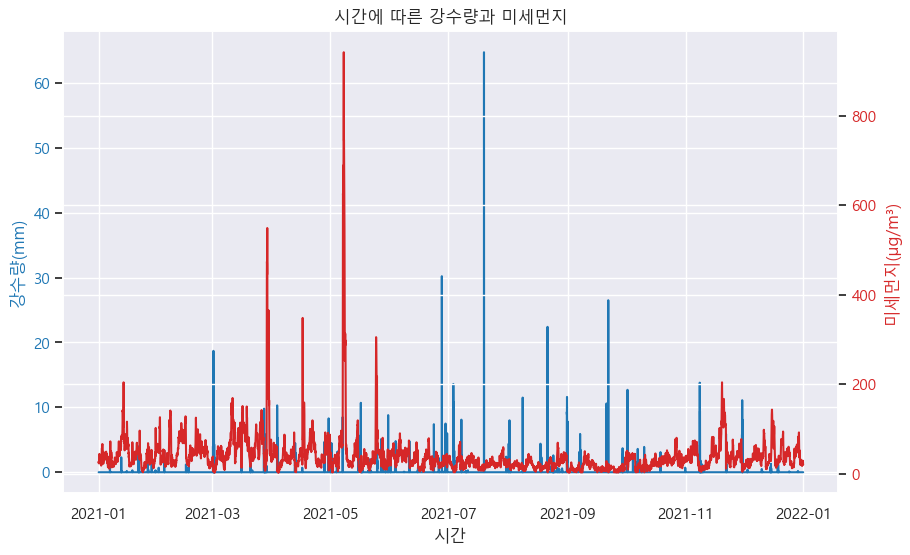

In [176]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 Y 축 (강수량)
ax1.set_xlabel('시간')
ax1.set_ylabel('강수량(mm)', color='tab:blue')
ax1.plot(df_21.index, df_21['강수량(mm)'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 두 번째 Y 축 (미세먼지)
ax2 = ax1.twinx()  # 두 번째 Y 축 생성
ax2.set_ylabel('미세먼지(µg/m³)', color='tab:red')
ax2.plot(df_21.index, df_21['PM10'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('시간에 따른 강수량과 미세먼지')
plt.grid(True)
plt.show()